In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
train_dir='D:\\TA\\Dataset\\train'
val_dir='D:\\TA\\Dataset\\val'
test_dir='D:\\TA\\Dataset\\test'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.5,
                                   rotation_range = 45,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2
                                  )

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)

In [4]:

train_dataset  = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 16, 
                                                   
                                                   )

validation_dataset = valid_datagen.flow_from_directory(directory = val_dir,
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 16, 
                                                  )

test_dataset = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 16)

Found 1072 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 137 images belonging to 3 classes.


In [5]:
load_model = tf.keras.models.load_model('D:\TA\Result\epoch\\175\model.hdf5')
load_model.evaluate(test_dataset)

9/9 [==============================] - 16s 1s/step - loss: 0.1289 - accuracy: 0.9854


[0.12888574600219727, 0.985401451587677]

In [6]:
class_names = train_dataset.class_indices
class_names

{'B3': 0, 'O': 1, 'R': 2}

In [7]:
# img = load_img("D:\TA\Dataset\\test\R\\20230217_172433.jpg", target_size=(224, 224))
# x = img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = x / 255.0  
# classes=load_model.predict(x)
# predicted_class_index = np.argmax(classes)
# for i, label in enumerate(class_names):
#     if predicted_class_index == i:
#         predic = classes[0][i]
#         print(label)

In [8]:
true_labels = []
predicted_labels = []

# Iterate over the test image files
for root, dirs, files in os.walk(test_dir):
    for file_name in files:
        # Construct the full path to the image file
        file_path = os.path.join(root, file_name)
        
        # Load and preprocess the image
        img = load_img(file_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  
        
        # Make predictions on the image
        classes = load_model.predict(x)
        predicted_class_index = np.argmax(classes)
        for i, label in enumerate(class_names):
            if predicted_class_index == i:
                predic = classes[0][i]
                predicted_labels.append(label)

        folder_name = os.path.basename(root)
        true_label = folder_name  

        true_labels.append(true_label)


confusion_mat = confusion_matrix(true_labels, predicted_labels)



1/1 [==============================] - 0s 27ms/step


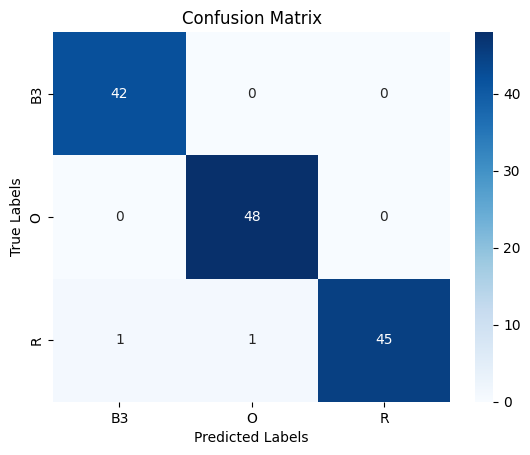

In [9]:
fig, ax = plt.subplots()


heatmap = sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)


ax.set_title('Confusion Matrix')


plt.show()

Precision: 0.9854453409270686
Recall: 0.9858156028368795
F1 Score: 0.9853956284441163


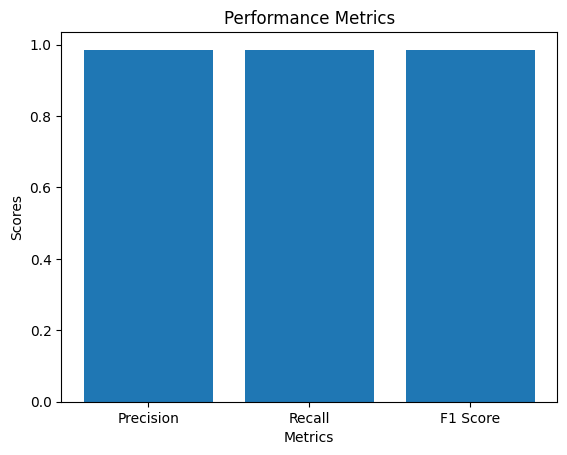

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_labels, predicted_labels, average='macro')

recall = recall_score(true_labels, predicted_labels, average='macro')

f1 = f1_score(true_labels, predicted_labels, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.show()

In [11]:
img = load_img('../20230628_215500.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0 
classes = load_model.predict(x)
print(classes)
predicted_class_index = np.argmax(classes)
for i, label in enumerate(class_names):
    if predicted_class_index == i:
        predic = classes[0][i]
        print(label)

1/1 [==============================] - 0s 29ms/step
[[0.23759964 0.00079931 0.76160103]]
R
